# Project1: Analyzing the Impact of Population Dynamics and Home Characteristics on Housing Prices and Affordability in U.S. Cities

Team Member: Yihan Guo, Muyang Zhou, Jingxuan Wang

## Overview
Housing affordability has always been one of the most significant challenges for individuals and families. To better understand the factors influencing housing prices, this project aims to explore the relationship between housing markets, population characteristics, and demographic trends in American cities. 

The overall goal of this project is to explore and predict how population dynamics and home-specific features influence housing prices across American cities.


## Motivation

For our project, we chose to explore the relationship between housing prices, population characteristics, and affordability because housing is one of the most pressing issues that affects everyday life. Whether it's buying a home or renting, housing costs are a major financial factor for most people, and rising prices have made it increasingly difficult for many to find affordable living options.

1. **Does population density affect house prices?**

By answering this question, I hope to understand whether areas with more people tend to have higher housing prices due to increased demand. I want to see if cities with higher density are generally more expensive and if this could explain why some places are becoming less affordable. This will help me explore the connection between where people live and how much they need to pay for housing.

2. **How do changes in population growth rates impact housing prices in different cities?**

I hope to learn how population changes affect housing demand. Specifically, I want to see if cities with growing populations experience rising house prices due to increased demand, and if cities with declining populations see prices stagnate or drop.

3. **How can individual home characteristics and local demographic factors predict house prices in American cities?**

By answering this question, I hope to understand how specific home features (like the number of bedrooms, bathrooms, and square footage) and broader location-based factors (like population density, median household income, and city growth rates) influence house prices.



## Data Sources
In this project, we will be using two datasets called **American House Price** and **Population of all US Cities 2024**

**American House Prices:** https://www.kaggle.com/datasets/jeremylarcher/american-house-prices-and-demographics-of-top-cities/data

**Population of all US Cities 2024:** https://www.kaggle.com/datasets/dataanalyst001/population-of-all-us-cities-2024

The **American House Prices** comprised various variables around housing and demographics for the top 50 American cities by population. And the **Population of all US Cities 2024** provided detailed information about the population of all the 300 US Cities for the years 2024 and 2020. It includes the annual population change, population density, and the area of all the US cities.

The two datasets complement each other by offering insights into both housing market dynamics and population demographics, which are two critical factors that influence each other. By combining these two datasets, we can gain a comprehensive understanding of how population characteristics and trends directly influence housing prices and affordability across the U.S.


## Data Description
### Housing Dataset
- **Size:** 39,981 entries, 14 variables
- **Variables of Interest:**
  1. **Zip Code** (integer): The postal code for the property.
  2. **Price** (float): The listed price of the house.
  3. **Beds** (integer): Number of bedrooms.
  4. **Baths** (integer): Number of bathrooms.
  5. **Living Space** (integer): Area of the property in square feet.
  6. **Address** (object): The specific address of the property.
  7. **City** (object): City where the property is located.
  8. **State** (object): State where the property is located.
  9. **Zip Code Population** (integer): Estimated number of individuals within the zip code.
  10. **Zip Code Density** (float): Estimated number of individuals per square mile within the zip code.
  11. **County** (object): County where the property is located.
  12. **Median Household Income** (float): Estimated median household income for the zip code (2 missing values).
  13. **Latitude** (float): Geographic coordinate (latitude) of the zip code.
  14. **Longitude** (float): Geographic coordinate (longitude) of the zip code.

- **Missing Values:** 2 missing values in the **Median Household Income** column.

### Population Dataset
- **Size:** 300 entries, 8 variables
- **Variables of Interest:**
  1. **Rank** (integer): Rank of the city by population.
  2. **US City** (object): Name of the city.
  3. **US State** (object): State where the city is located.
  4. **Population 2024** (integer): Population for 2024.
  5. **Population 2020** (integer): Population for 2020.
  6. **Annual Change** (float): Annual population change rate.
  7. **Density (/mile²)** (integer): Population density per square mile.
  8. **Area (mile²)** (float): City area in square miles.

- **Missing Values:** None. All columns are fully populated.

### Note: The data primarily represents high-density areas within a state, which means that some of the numerical results from our analysis might not perfectly reflect real-world values. However, the analysis can still provide valuable insights and 

## Data Cleaning

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv("../data/American_Housing_Data_20231209-1.csv")

In [42]:
# check for missing values for house price data
df[df.isnull().any(axis=1)]

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
27785,80939,460000.0,3,3,1444,3124 LOOT DR,Colorado Springs,Colorado,0,0.0,El Paso,NaN,38.87772,-104.67742
27786,80939,565000.0,6,4,3064,2418 TEMPEST DR,Colorado Springs,Colorado,0,0.0,El Paso,NaN,38.87772,-104.67742


In [43]:
df_pop = pd.read_csv("../data/Population of all US Cities 2024.csv")

In [44]:
# check for missing values for population data
df_pop[df_pop.isnull().any(axis=1)]

,Rank,US City,US State,Population 2024,Population 2020,Annual Change,Density (/mile2),Area (mile2)


In [45]:
# check duplicated rows
df.drop_duplicates(inplace=True)
df_pop.drop_duplicates(inplace=True)

In [46]:
df.head()

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
5,10017,764900.0,1,1,643,145 E 48TH ST APT 11E,New York,New York,15514,20107.7,New York,188289.0,40.75235,-73.97260


In [47]:
df_pop.head()

,Rank,US City,US State,Population 2024,Population 2020,Annual Change,Density (/mile2),Area (mile2)
0,1,New York,New York,8097282,8740292,-0.0195,26950,300.46
1,2,Los Angeles,California,3795936,3895848,-0.0065,8068,470.52
2,3,Chicago,Illinois,2638159,2743329,-0.0099,11584,227.75
3,4,Houston,Texas,2319119,2299269,0.0021,3620,640.61
4,5,Phoenix,Arizona,1662607,1612459,0.0076,3208,518.33


In [48]:
# merge the two dataframes on the City column
temp = df.merge(df_pop, left_on="City", right_on='US City', how="inner")

In [49]:
# check for missing values and drop them
miss_index = temp[temp.isnull().any(axis=1)].index
temp.drop(miss_index, inplace=True)

In [50]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36588 entries, 0 to 36589
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Zip Code                 36588 non-null  int64  
 1   Price                    36588 non-null  float64
 2   Beds                     36588 non-null  int64  
 3   Baths                    36588 non-null  int64  
 4   Living Space             36588 non-null  int64  
 5   Address                  36588 non-null  object 
 6   City                     36588 non-null  object 
 7   State                    36588 non-null  object 
 8   Zip Code Population      36588 non-null  int64  
 9   Zip Code Density         36588 non-null  float64
 10  County                   36588 non-null  object 
 11  Median Household Income  36588 non-null  float64
 12  Latitude                 36588 non-null  float64
 13  Longitude                36588 non-null  float64
 14  Rank                     36

In [51]:
temp.head()

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,...,Latitude,Longitude,Rank,US City,US State,Population 2024,Population 2020,Annual Change,Density (/mile2),Area (mile2)
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,...,40.72001,-74.00472,1,New York,New York,8097282,8740292,-0.0195,26950,300.46
1,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,...,40.73407,-74.00601,1,New York,New York,8097282,8740292,-0.0195,26950,300.46
2,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,...,40.73407,-74.00601,1,New York,New York,8097282,8740292,-0.0195,26950,300.46
3,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,...,40.73407,-74.00601,1,New York,New York,8097282,8740292,-0.0195,26950,300.46
4,10017,764900.0,1,1,643,145 E 48TH ST APT 11E,New York,New York,15514,20107.7,...,40.75235,-73.97260,1,New York,New York,8097282,8740292,-0.0195,26950,300.46


In [52]:
# check number of cities and counties
print("Number of City in dataset",temp.City.nunique())
print("Number of County in dataset",temp.County.nunique())
print("Number of State in dataset",temp.State.nunique())

Number of City in dataset 61
Number of County in dataset 66
Number of State in dataset 27


In [53]:
# check number of counties each city is in
df.groupby("City")[["County"]].nunique().sort_values(by="County", ascending=False)

,County
City,
Kansas City,4
Indianapolis,3
Atlanta,3
Denver,3
Austin,3
...,...
Hanford,1
Harbor City,1
Harper Woods,1


In [54]:
# check if there is duplicated house info except for the county by
df[df.duplicated(subset=[col for col in df.columns if col != 'county'])]

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude


Check for duplicate house price information, as each city may belong to multiple counties.

In [55]:
# add label column for price
temp['Price Label'] = pd.qcut(temp.Price, q=5, labels=["Low", "Medium Low", "Medium","Medium High", "High"])

 We create a new label column which provides a convenient way to analyze and compare housing prices across these different price tiers.

In [56]:
# rename columns so that they are more readable
temp.rename(columns={"Population 2024":"City Population", "Annual Change": "City 2024 Change Rate", "Density (/mile2)": "City Density", "Area (mile2)": "City Area"}, inplace=True)

In [57]:
# drop unnecessary columns
temp.drop(columns=["US City", "US State", "Population 2020", "Address"], inplace=True)

In [58]:
# add a column to the dataframe that shows the mean price of houses in each city
temp['mean_price_city'] = temp.groupby('City')['Price'].transform('mean')
temp

,Zip Code,Price,Beds,Baths,Living Space,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude,Rank,City Population,City 2024 Change Rate,City Density,City Area,Price Label,mean_price_city
0,10013,3999000.0,2,3,1967,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472,1,8097282,-0.0195,26950,300.46,High,1.285112e+06
1,10014,1650000.0,1,1,718,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601,1,8097282,-0.0195,26950,300.46,High,1.285112e+06
2,10014,760000.0,3,2,1538,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601,1,8097282,-0.0195,26950,300.46,High,1.285112e+06
3,10014,1100000.0,1,1,600,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601,1,8097282,-0.0195,26950,300.46,High,1.285112e+06
4,10017,764900.0,1,1,643,New York,New York,15514,20107.7,New York,188289.0,40.75235,-73.97260,1,8097282,-0.0195,26950,300.46,High,1.285112e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36585,98199,2495000.0,4,4,3380,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223,18,759915,0.0064,9047,84.00,High,1.021951e+06
36586,98199,2295000.0,4,4,2878,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223,18,759915,0.0064,9047,84.00,High,1.021951e+06
36587,98199,950000.0,3,2,1380,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223,18,759915,0.0064,9047,84.00,High,1.021951e+06
36588,98199,425000.0,2,1,856,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223,18,759915,0.0064,9047,84.00,Medium,1.021951e+06


We created a new column called mean_price_city to facilitate the comparison of city-level housing prices with other features.

In [59]:
temp.head()

,Zip Code,Price,Beds,Baths,Living Space,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude,Rank,City Population,City 2024 Change Rate,City Density,City Area,Price Label,mean_price_city
0,10013,3999000.0,2,3,1967,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472,1,8097282,-0.0195,26950,300.46,High,1.285112e+06
1,10014,1650000.0,1,1,718,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601,1,8097282,-0.0195,26950,300.46,High,1.285112e+06
2,10014,760000.0,3,2,1538,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601,1,8097282,-0.0195,26950,300.46,High,1.285112e+06
3,10014,1100000.0,1,1,600,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601,1,8097282,-0.0195,26950,300.46,High,1.285112e+06
4,10017,764900.0,1,1,643,New York,New York,15514,20107.7,New York,188289.0,40.75235,-73.97260,1,8097282,-0.0195,26950,300.46,High,1.285112e+06


In [60]:
temp[["Price", "Beds","Baths","Living Space", "City Population", "City 2024 Change Rate", "City Density", "City Area","Median Household Income"]].describe()

,Price,Beds,Baths,Living Space,City Population,City 2024 Change Rate,City Density,City Area,Median Household Income
count,3.658800e+04,36588.000000,36588.000000,36588.000000,3.658800e+04,36588.000000,36588.000000,36588.000000,36588.000000
mean,5.940684e+05,3.165737,2.445583,1882.220400,7.878121e+05,-0.000398,4780.102301,219.081488,109630.805291
std,8.601468e+05,1.300052,1.317341,1200.704118,5.957998e+05,0.008587,3397.092704,161.628219,46912.332595
min,1.950000e+03,1.000000,1.000000,2.000000,1.172140e+05,-0.025400,754.000000,10.430000,27475.000000
25%,2.599000e+05,3.000000,2.000000,1200.000000,4.801940e+05,-0.006500,2434.000000,115.820000,74894.000000
50%,3.949000e+05,3.000000,2.000000,1627.000000,5.592660e+05,0.000300,3632.000000,169.500000,98898.000000
75%,6.490000e+05,4.000000,3.000000,2240.000000,9.231640e+05,0.004800,5375.000000,296.200000,133779.000000
max,3.800000e+07,54.000000,66.000000,74340.000000,8.097282e+06,0.027600,26950.000000,747.260000,389928.000000


I prefer not to remove outliers from house prices because there are significant disparities in housing prices between states. Removing outliers would result in the loss of valuable data, particularly for states with higher price levels. Outliers in household income often represent the wealthiest segments of the population. Removing these outliers would mask the real disparities and income inequality present in many regions, which is a critical aspect when analyzing economic conditions.

## Data Visualization

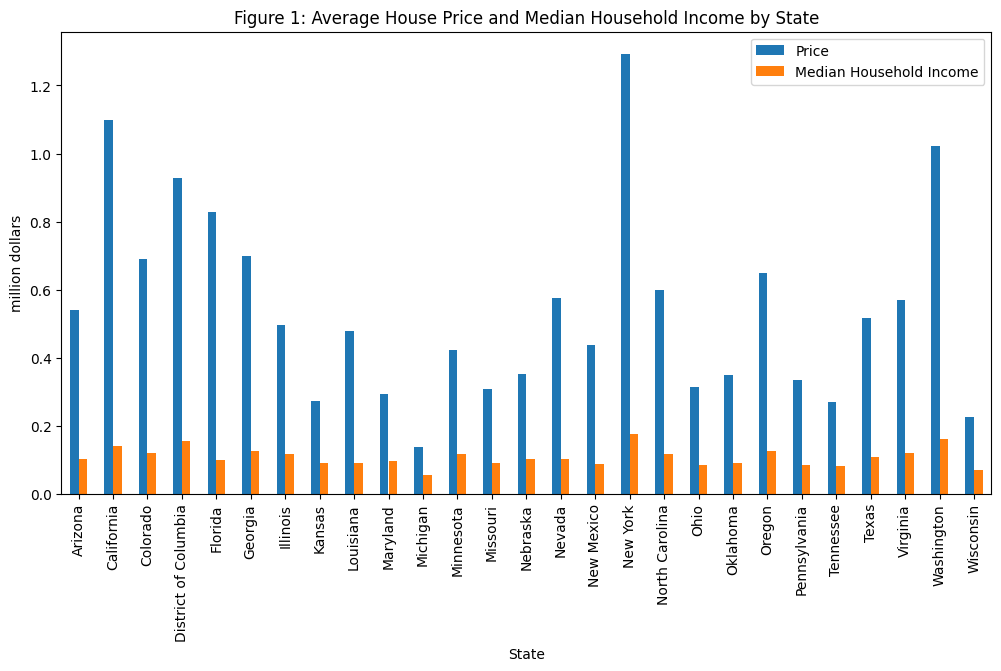

In [61]:
# compute the mean price of houses and mean median household income by state
# and plot the result
price_income = temp.groupby("State")[["Price","Median Household Income"]].mean() / 1e6
price_income.plot(kind="bar", figsize=(12, 6))
plt.title("Figure 1: Average House Price and Median Household Income by State")
plt.ylabel("million dollars")
plt.show()


In figure 1 we use bar plot to compare household income and house price within states and across states.

While incomes across states seem to be somewhat consistent (most orange bars are close to each other), the variation in house prices is much larger. This suggests that while household earnings might be comparable, the cost of owning a house varies dramatically depending on the state, leading to different levels of financial strain for potential homebuyers.

New York has the highest average house price among all states, with house prices reaching over $1 million. This makes New York an outlier in terms of housing cost, and the affordability challenge is pronounced, as the income level does not scale up in proportion to house prices.

There are large regional disparities in house prices. States like New York, California, and Washington also exhibit relatively high house prices compared to their respective household incomes, indicating that housing in these states may also be less affordable for residents. On the other hand, states like Louisiana, Kansas, and Nebraska have more moderate house prices, although their incomes remain relatively low as well.

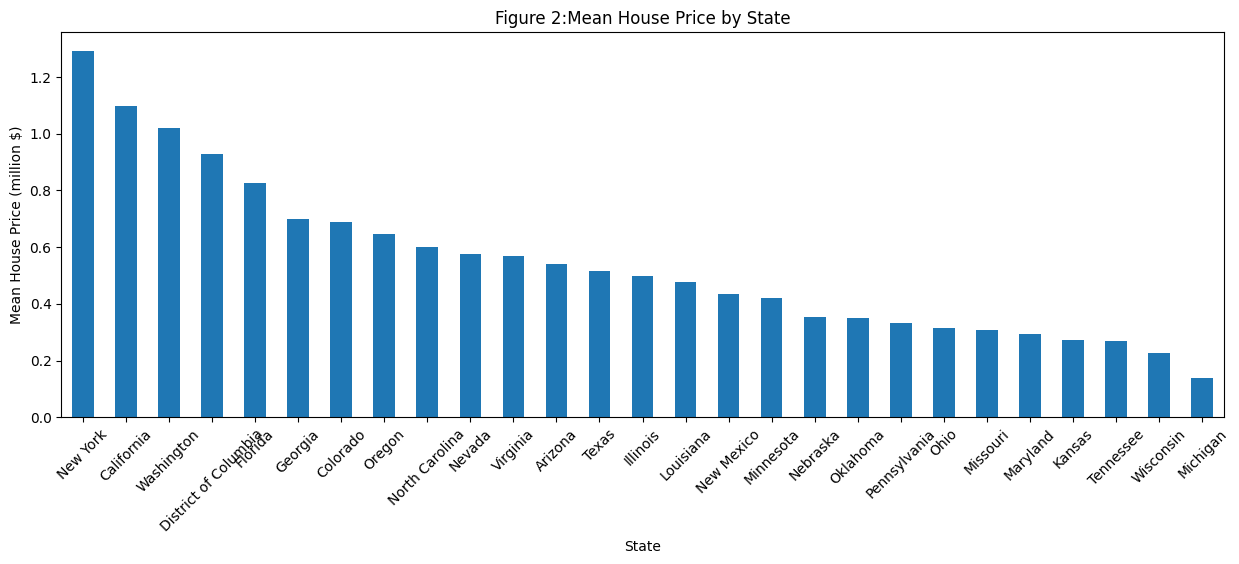

In [62]:
# calculate the mean price of houses by state and plot the result
mean_price = temp.groupby('State').Price.mean().sort_values(ascending=False)/1e6
mean_price.plot(kind='bar', figsize=(15,5))
plt.title("Figure 2:Mean House Price by State")
plt.xlabel("State")
plt.xticks(rotation=45)
plt.ylabel("Mean House Price (million $)")
plt.show()

In Figure 2 we compare the mean house price by state.

New York and California Lead in House Prices: New York has the highest mean house price, exceeding 1.2 million dollars, followed by California at around 1 million dollars. These states stand out significantly from the others, suggesting that housing affordability may be more challenging in these areas.

Many of the states with higher house prices, such as New York, California, Washington, and the District of Columbia, are coastal states or have large urban populations. This is consistent with trends in housing markets where urban and coastal areas tend to have more expensive real estate due to demand and population density.

States like Michigan, Wisconsin, and Kansas have the lowest mean house prices, well below 0.5 million dollars. These areas may offer more affordable housing options, especially compared to the higher-priced states. This could be a reflection of lower demand, less urbanization, or differences in cost of living.

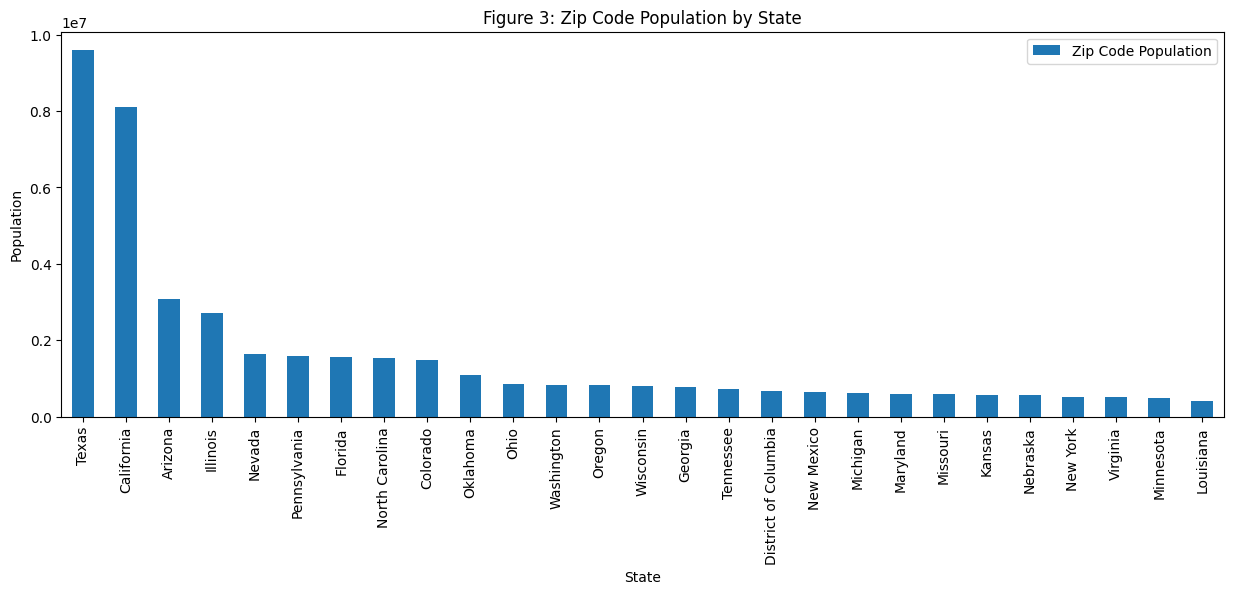

In [63]:
# calculate the population of each state and plot the result
zip_code = temp.drop_duplicates(subset=["Zip Code"])
zip_code.groupby("State")[["Zip Code Population"]].sum().sort_values(by = 'Zip Code Population', ascending=False).plot(kind="bar", figsize=(15, 5))
plt.title("Figure 3: Zip Code Population by State")
plt.ylabel("Population")
plt.show()

From figure 3 we can see that New York and California dominate the expensive housing markets, while Texas and California have large populations. Bt Combining figure 2 and figure3, there is no direct correlation between high population and high house prices, as seen with Texas, which has a large population but relatively moderate house prices compared to California and New York.

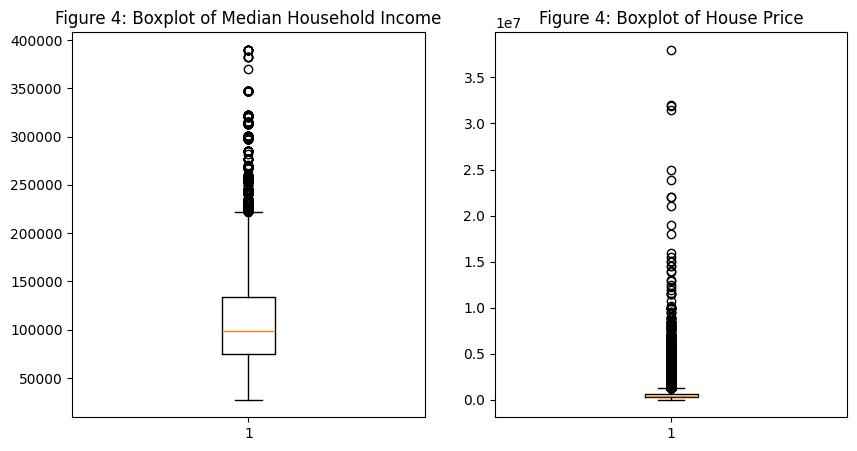

In [64]:
# ues boxplot to visualize the distribution of median household income and house price
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.boxplot(temp[["Median Household Income"]])
ax2.boxplot(temp[["Price"]])
ax1.set_title("Figure 4: Boxplot of Median Household Income")
ax2.set_title("Figure 4: Boxplot of House Price")
plt.show()

In figure 4 we use boxplot to see the distribution of median household income and house price. The boxplot of median household income shows some asymmetry (a right-skew), as the upper whisker is longer than the lower whisker, and there are more outliers on the higher end. The boxplot of house price shows that while most homes are affordable for the middle-income bracket, there are some extremely high-priced outliers that may not align with the general income distribution.

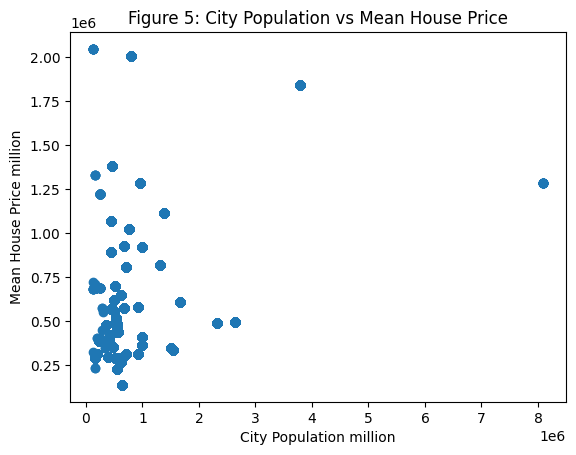

In [65]:
# scatter plot of city population vs mean house price
plt.scatter(temp['City Population'], temp['mean_price_city'])
plt.title("Figure 5: City Population vs Mean House Price")
plt.xlabel("City Population million")
plt.ylabel("Mean House Price million")
plt.show()

In figure 5, there is no strong linear correlation between city population and mean house price. This suggests that factors other than population size play a major role in determining house prices.

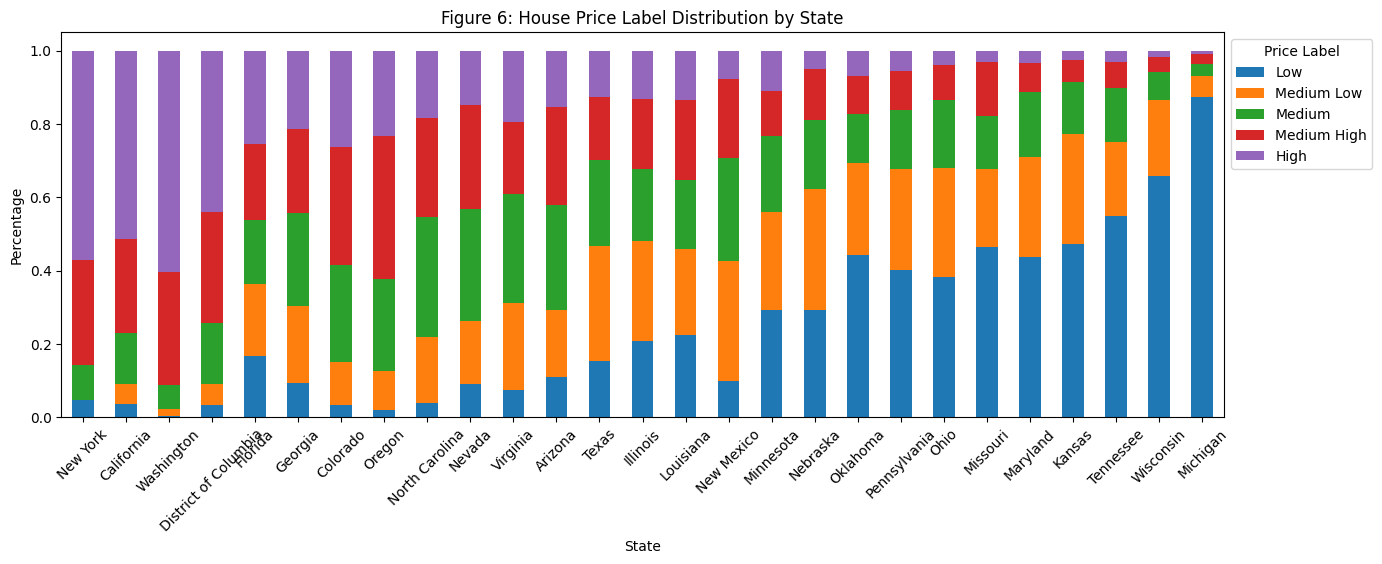

In [66]:
# calculate the percentage of each price label in each state and plot the result
state_list = mean_price.index.tolist()
state_price = temp.groupby("State")["Price Label"].value_counts(normalize=True).unstack()
state_price = state_price.loc[state_list]
state_price.plot(kind='bar', stacked=True, figsize=(15,5))
plt.title("Figure 6: House Price Label Distribution by State")
plt.xlabel("State")
plt.xticks(rotation=45)
plt.ylabel("Percentage")
plt.legend(title='Price Label', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

Figure 6 provides a clear visualization of how house prices are distributed across states, revealing which areas have more affordable housing and which areas are dominated by higher prices.

States such as New York, California, and Washington have a significant portion of homes categorized as "High" value (purple), indicating that these states are dominated by high-priced homes.

States like North Carolina, Nevada, and Virginia have relatively moderate mean house prices. Interestingly, these states have very few homes in the "Low" value (blue) category, which implies that even though their overall mean house price is moderate, their housing stock leans towards the higher end.

States such as Michigan, Wisconsin, and Kansas have a much larger proportion of homes in the "Low" price category, reflecting their more affordable housing markets.